In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def fetch_images(query, max_images, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    url = f"https://www.google.com/search?q={query}&tbm=isch"
    headers = {"User-Agent": "Mozilla/5.0"}

    downloaded = 0
    start = 0
    while downloaded < max_images:
        response = requests.get(url + f"&start={start}", headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        img_tags = soup.find_all('img')

        for img in img_tags:
            if downloaded >= max_images:
                break
            try:
                img_url = img.get('src') or img.get('data-src')
                if img_url:
                    img_url = urljoin(url, img_url)
                    img_data = requests.get(img_url).content
                    img_name = os.path.join(save_dir, f"{query}_{downloaded}.jpg")
                    with open(img_name, 'wb') as handler:
                        handler.write(img_data)
                    downloaded += 1
            except Exception as e:
                print(f"Could not download image {img_url}. Error: {e}")

        start += 20  # Adjust as needed to get more images per search

# Define categories
categories = ["rose", "tulip", "daisy", "sunflower", "lily",
              "orchid", "carnation", "hydrangea", "peony", "poppy"]
# Add more categories as needed

# Download images for each category
for category in categories:
    fetch_images(category, 1000, f"/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_dataset/{category}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def prepare_dataset(base_dir, categories, train_dir, val_dir, test_dir, test_size=0.2, val_size=0.1):
    for category in categories:
        img_dir = os.path.join(base_dir, category)
        if not os.path.exists(img_dir) or len(os.listdir(img_dir)) == 0:
            print(f"Directory {img_dir} is empty or does not exist.")
            continue

        images = [img for img in os.listdir(img_dir) if img.endswith('.jpg')]
        if len(images) == 0:
            print(f"No images found in {img_dir}")
            continue

        # Adjust val_size to ensure train + val split is done correctly
        adjusted_val_size = val_size / (1 - test_size)

        train, test = train_test_split(images, test_size=test_size, random_state=42)
        train, val = train_test_split(train, test_size=adjusted_val_size, random_state=42)

        for img in train:
            category_train_dir = os.path.join(train_dir, category)
            if not os.path.exists(category_train_dir):
                os.makedirs(category_train_dir)
            shutil.move(os.path.join(img_dir, img), os.path.join(category_train_dir, img))

        for img in val:
            category_val_dir = os.path.join(val_dir, category)
            if not os.path.exists(category_val_dir):
                os.makedirs(category_val_dir)
            shutil.move(os.path.join(img_dir, img), os.path.join(category_val_dir, img))

        for img in test:
            category_test_dir = os.path.join(test_dir, category)
            if not os.path.exists(category_test_dir):
                os.makedirs(category_test_dir)
            shutil.move(os.path.join(img_dir, img), os.path.join(category_test_dir, img))

# Example usage:
categories = ["rose", "tulip", "daisy", "sunflower", "lily", "orchid", "carnation", "hydrangea", "peony", "poppy"]
base_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_dataset"
train_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/val"
test_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/test"

prepare_dataset(base_dir, categories, train_dir, val_dir, test_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

def count_files_in_directory(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([f for f in files if f.endswith('.jpg')])
    return count

# Directories
base_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_dataset"
train_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/val"
test_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/test"

# Count files in each split
base_count = count_files_in_directory(base_dir)
train_count = count_files_in_directory(train_dir)
val_count = count_files_in_directory(val_dir)
test_count = count_files_in_directory(test_dir)

print(f"Original dataset: {base_count} images")
print(f"Training set: {train_count} images")
print(f"Validation set: {val_count} images")
print(f"Testing set: {test_count} images")


Original dataset: 9419 images
Training set: 6269 images
Validation set: 1322 images
Testing set: 1364 images


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
base_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_dataset"
train_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/val"
test_dir = "/content/drive/My Drive/Colab Notebooks/plant_subspecies_split/test"

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 6269 images belonging to 10 classes.
Found 1322 images belonging to 10 classes.
Found 1364 images belonging to 10 classes.


Found 7000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
219/219 [==============================] - ETA: 0s - loss: 1.5955 - accuracy: 0.4760 - mean_average_precision: 0.4760

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:2723: UserWarning: Metric MeanAveragePrecision implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


219/219 [==============================] - 2403s 11s/step - loss: 1.5955 - accuracy: 0.4760 - mean_average_precision: 0.4760 - val_loss: 1.4137 - val_accuracy: 0.5340 - val_mean_average_precision: 0.5340
Epoch 2/50
219/219 [==============================] - 41s 186ms/step - loss: 1.1500 - accuracy: 0.5901 - mean_average_precision: 0.5901 - val_loss: 1.2764 - val_accuracy: 0.5570 - val_mean_average_precision: 0.5570
Epoch 3/50
219/219 [==============================] - 41s 189ms/step - loss: 0.9800 - accuracy: 0.6456 - mean_average_precision: 0.6456 - val_loss: 1.2610 - val_accuracy: 0.5730 - val_mean_average_precision: 0.5730
Epoch 4/50
219/219 [==============================] - 40s 183ms/step - loss: 0.8289 - accuracy: 0.7013 - mean_average_precision: 0.7013 - val_loss: 1.3283 - val_accuracy: 0.5560 - val_mean_average_precision: 0.5560
Epoch 5/50
219/219 [==============================] - 41s 187ms/step - loss: 0.7503 - accuracy: 0.7291 - mean_average_precision: 0.7291 - val_loss: 1.3

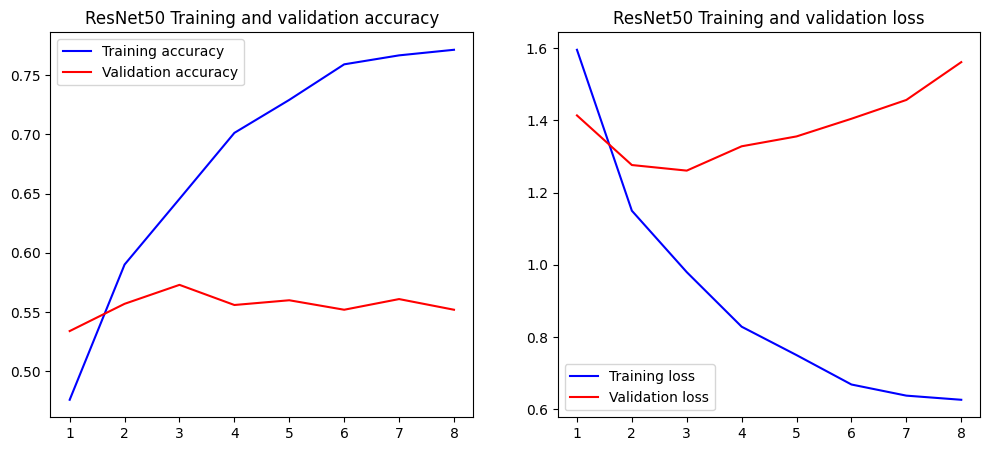

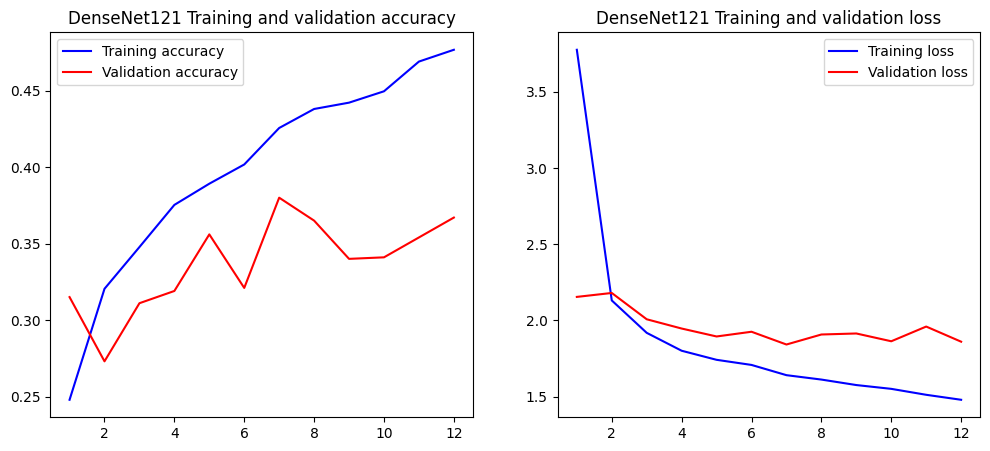

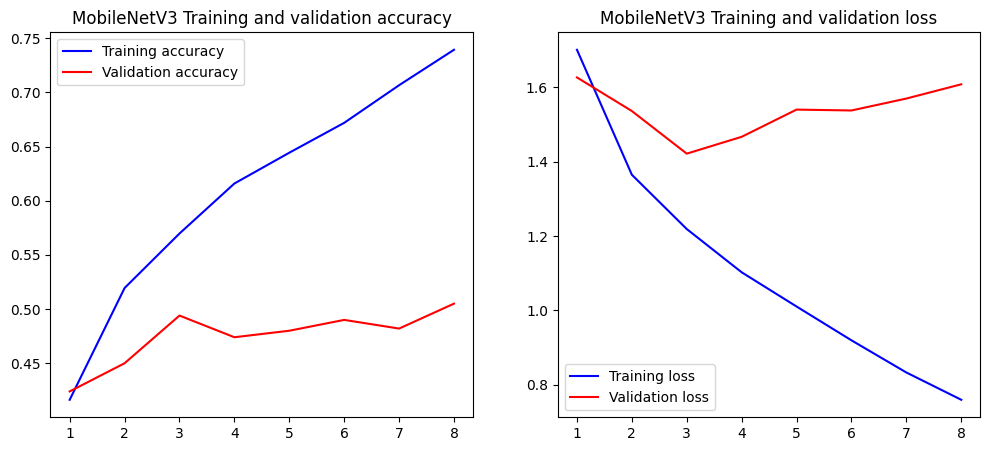

63/63 [==============================] - 12s 165ms/step


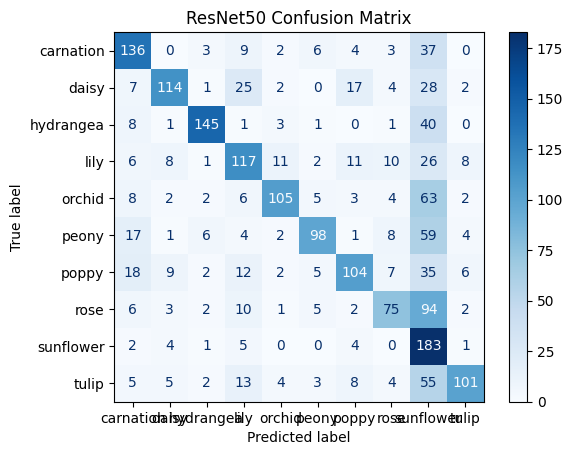

63/63 [==============================] - 13s 168ms/step


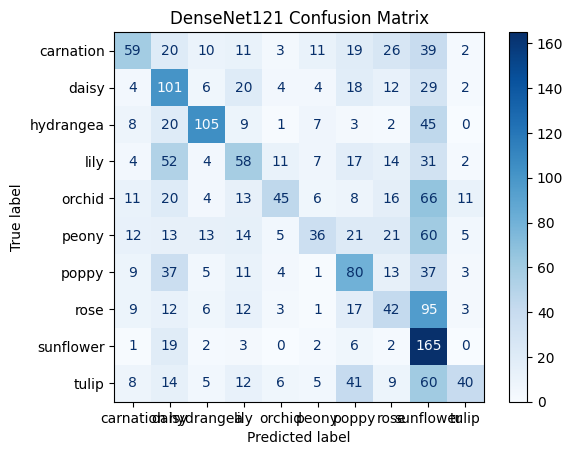

63/63 [==============================] - 11s 155ms/step


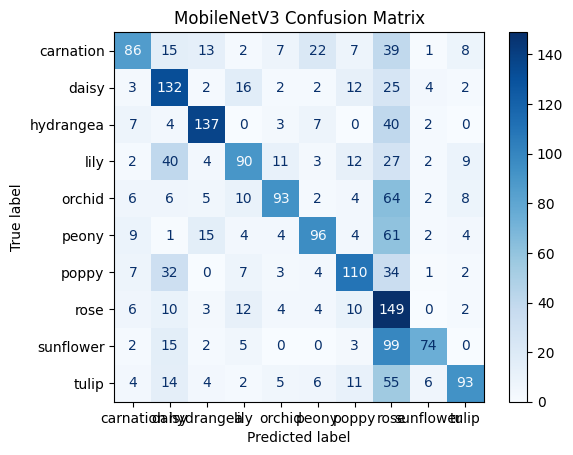

ResNet50 Test Loss: 1.2012792825698853, Test Accuracy: 0.5889999866485596, Test mAP: 0.5889999270439148
DenseNet121 Test Loss: 1.8531609773635864, Test Accuracy: 0.36550000309944153, Test mAP: 0.36549994349479675
MobileNetV3 Test Loss: 1.3809926509857178, Test Accuracy: 0.5299999713897705, Test mAP: 0.5299999117851257


In [2]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define directories
train_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/train"
val_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/val"
test_dir = "/content/drive/My Drive/Colab Notebooks/Data/plant_subspecies_split/test"

# Parameters
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Assuming each category has its own subdirectory

# Data generators with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess)
val_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess)
test_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Function to create a model
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    return model

# Custom mAP metric
class MeanAveragePrecision(tf.keras.metrics.Metric):
    def __init__(self, name="mean_average_precision", **kwargs):
        super(MeanAveragePrecision, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="true_positives", initializer="zeros")
        self.false_positives = self.add_weight(name="false_positives", initializer="zeros")
        self.false_negatives = self.add_weight(name="false_negatives", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=1)
        y_true = tf.argmax(y_true, axis=1)
        self.true_positives.assign_add(tf.reduce_sum(tf.cast(y_true == y_pred, tf.float32)))
        self.false_positives.assign_add(tf.reduce_sum(tf.cast(y_pred != y_true, tf.float32)))
        self.false_negatives.assign_add(tf.reduce_sum(tf.cast(y_true != y_pred, tf.float32)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives)
        recall = self.true_positives / (self.true_positives + self.false_negatives)
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

# Compile, train and evaluate a model
def compile_train_evaluate_model(model, train_generator, val_generator, test_generator, model_name):
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', MeanAveragePrecision()])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    start_time = time.time()
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=val_generator,
        callbacks=[early_stopping]
    )
    training_time = time.time() - start_time

    scores = model.evaluate(test_generator)
    print(f"{model_name} Test Loss: {scores[0]}, Test Accuracy: {scores[1]}, Test mAP: {scores[2]}")
    print(f"{model_name} Training Time: {training_time:.2f} seconds")

    return history, scores, training_time

# Train and evaluate models
models_info = {}

# ResNet50
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet = create_model(base_model_resnet)
history_resnet, scores_resnet, training_time_resnet = compile_train_evaluate_model(model_resnet, train_generator, val_generator, test_generator, "ResNet50")
models_info["ResNet50"] = (history_resnet, scores_resnet, training_time_resnet)

# DenseNet121
train_generator.preprocessing_function = densenet_preprocess
val_generator.preprocessing_function = densenet_preprocess
test_generator.preprocessing_function = densenet_preprocess

base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_densenet = create_model(base_model_densenet)
history_densenet, scores_densenet, training_time_densenet = compile_train_evaluate_model(model_densenet, train_generator, val_generator, test_generator, "DenseNet121")
models_info["DenseNet121"] = (history_densenet, scores_densenet, training_time_densenet)

# MobileNetV3
train_generator.preprocessing_function = mobilenet_preprocess
val_generator.preprocessing_function = mobilenet_preprocess
test_generator.preprocessing_function = mobilenet_preprocess

base_model_mobilenet = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_mobilenet = create_model(base_model_mobilenet)
history_mobilenet, scores_mobilenet, training_time_mobilenet = compile_train_evaluate_model(model_mobilenet, train_generator, val_generator, test_generator, "MobileNetV3")
models_info["MobileNetV3"] = (history_mobilenet, scores_mobilenet, training_time_mobilenet)

# Function to plot training history
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{model_name} Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{model_name} Training and validation loss')
    plt.legend()

    plt.show()

# Plot training history for each model
for model_name, (history, _, _) in models_info.items():
    plot_history(history, model_name)

# Function to plot confusion matrix
def plot_confusion_matrix(model, test_generator, model_name):
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    cm = confusion_matrix(test_generator.classes, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot confusion matrix for each model
for model_name, (history, scores, training_time) in models_info.items():
    model = None
    if model_name == "ResNet50":
        model = model_resnet
    elif model_name == "DenseNet121":
        model = model_densenet
    elif model_name == "MobileNetV3":
        model = model_mobilenet

    plot_confusion_matrix(model, test_generator, model_name)

# Print summary of results
for model_name, (history, scores, training_time) in models_info.items():
    print(f"{model_name} Test Loss: {scores[0]}, Test Accuracy: {scores[1]}, Test mAP: {scores[2]}")
